# Инжиниринг численных признаков


# Содержание работы

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузить прилагающийся к работе датасет PRSA_Data

In [3]:
prsa_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML5.2%20numeric%20features/data/PRSA_Data.csv", index_col=0)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


### 2. Выведите на экран основную информацию о датасете. Идентифицируйте значения вне разумного диапазона


In [4]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   SO2        35064 non-null  float64
 2   NO2        35064 non-null  float64
 3   CO         35064 non-null  float64
 4   O3         35064 non-null  float64
 5   PRES       35064 non-null  float64
 6   RAIN       35064 non-null  float64
 7   wd         35064 non-null  object 
 8   WSPM       35064 non-null  float64
 9   AQI Label  35064 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [5]:
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [6]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


### 3. Постройте визуализацию распределения каждого численного атрибута.

<Axes: xlabel='SO2', ylabel='Count'>

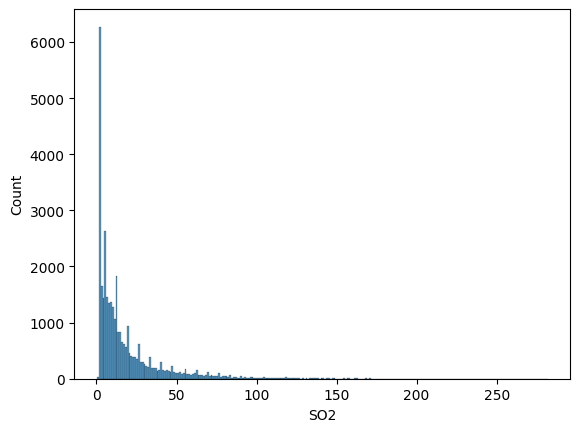

In [7]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

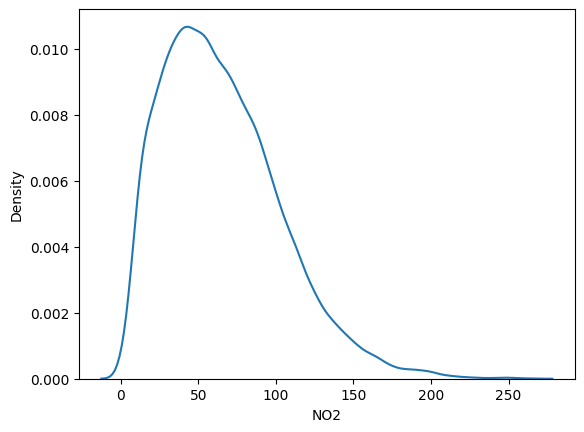

In [8]:
sns.kdeplot(prsa_data.NO2)

<Axes: xlabel='CO', ylabel='Count'>

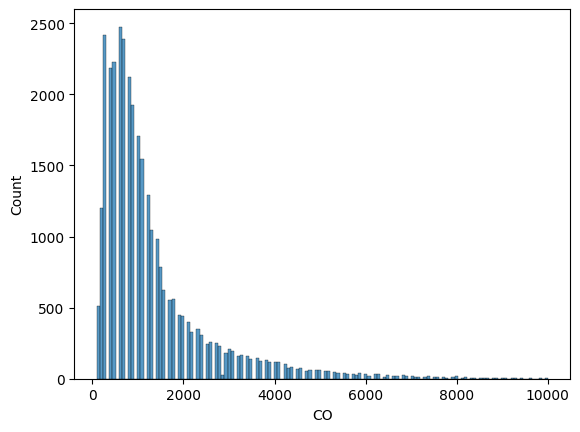

In [9]:
sns.histplot(prsa_data.CO)

<Axes: xlabel='O3', ylabel='Count'>

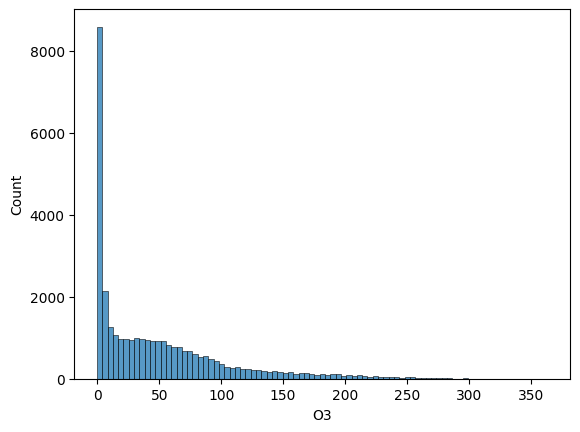

In [10]:
sns.histplot(prsa_data.O3)

<Axes: xlabel='RAIN', ylabel='Count'>

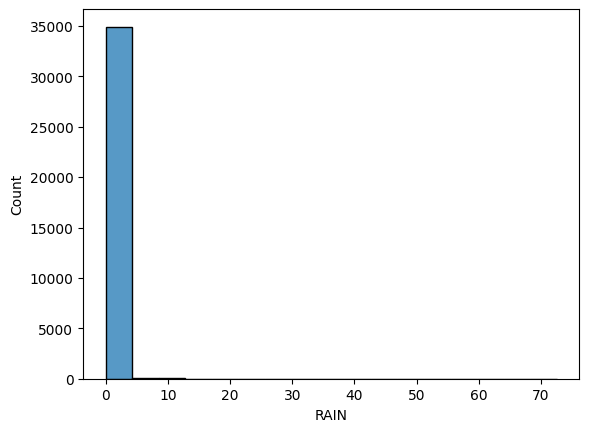

In [11]:
sns.histplot(prsa_data.RAIN)

<Axes: xlabel='PRES', ylabel='Count'>

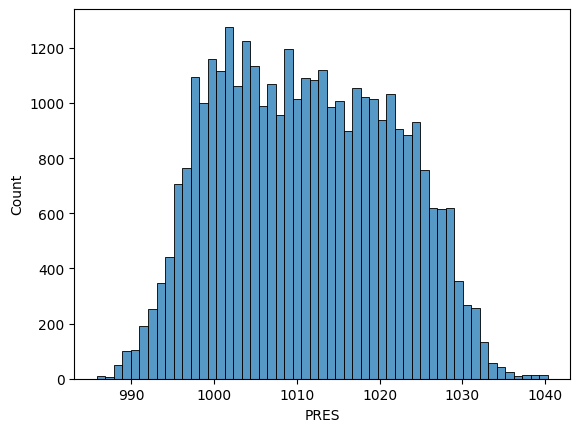

In [12]:
sns.histplot(prsa_data.PRES)

<Axes: xlabel='WSPM', ylabel='Count'>

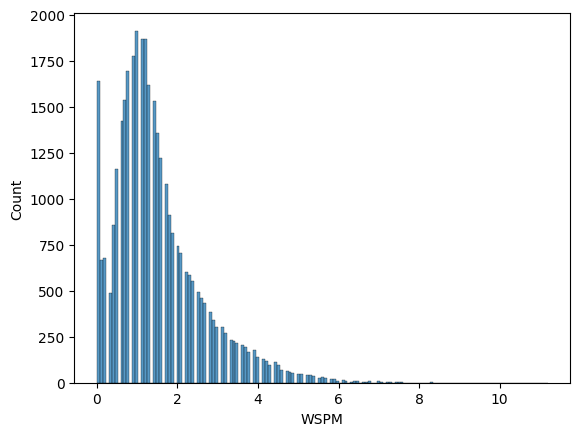

In [13]:
sns.histplot(prsa_data.WSPM)

### 4. Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.


In [14]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [15]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


### 5. Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.


<Axes: xlabel='SO2', ylabel='Density'>

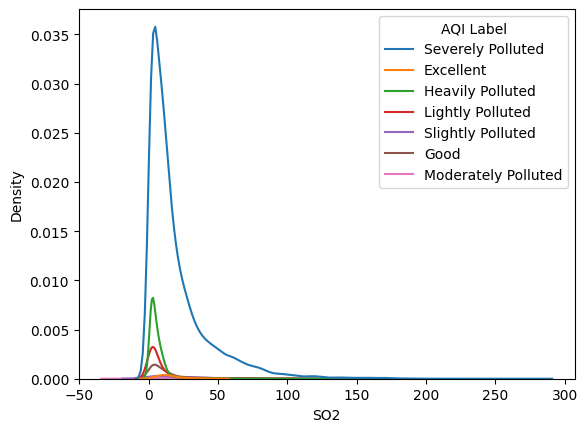

In [16]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='NO2', ylabel='Density'>

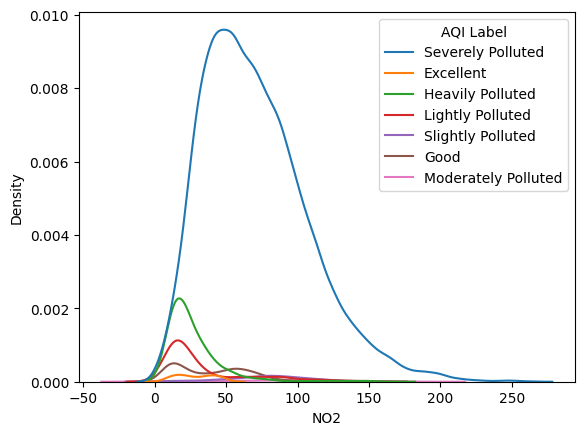

In [17]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

/tmp/ipykernel_1761/491964310.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

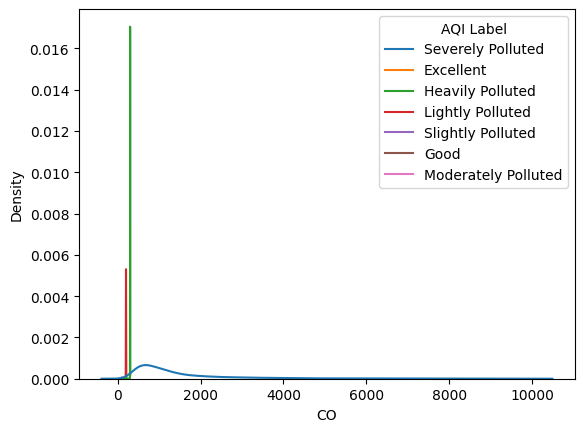

In [18]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

/tmp/ipykernel_1761/2756761127.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

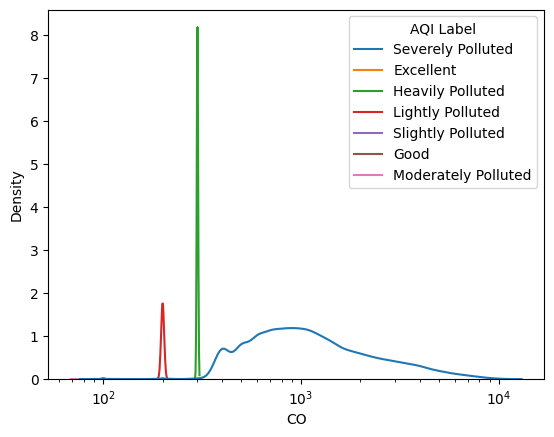

In [19]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

<Axes: xlabel='O3', ylabel='Density'>

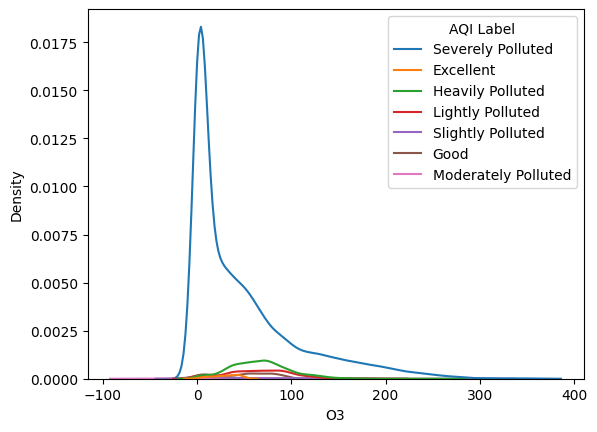

In [20]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label", log_scale=False)

<Axes: xlabel='PRES', ylabel='Density'>

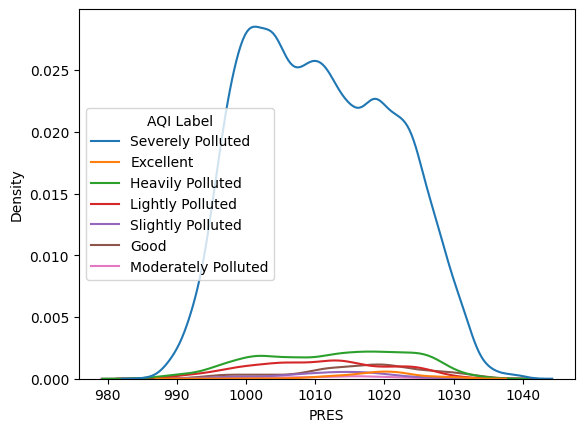

In [21]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label", log_scale=False)

<Axes: xlabel='WSPM', ylabel='Density'>

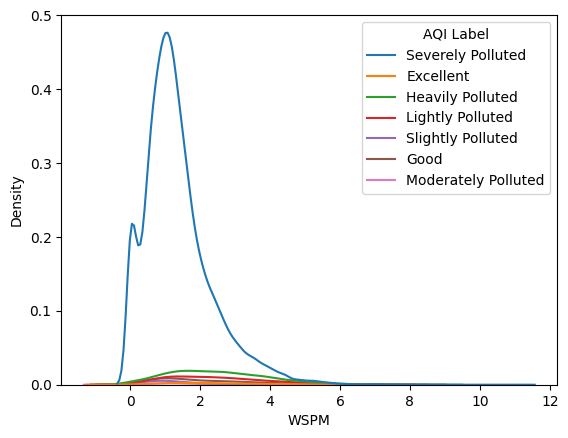

In [22]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label", log_scale=False)

/tmp/ipykernel_1761/2756761127.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

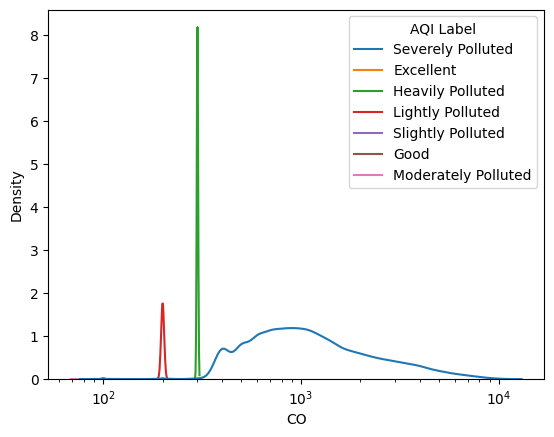

In [23]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

In [24]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']), 
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [25]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


### 6. Удалите или ограничьте экстремальные значения атрибутов.

In [26]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

/tmp/ipykernel_1761/3964902396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES <= 992] = 992
/tmp/ipykernel_1761/3964902396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prsa_data.PRES[prsa_data.PRES >= 1034] = 1034


<Axes: xlabel='PRES', ylabel='Count'>

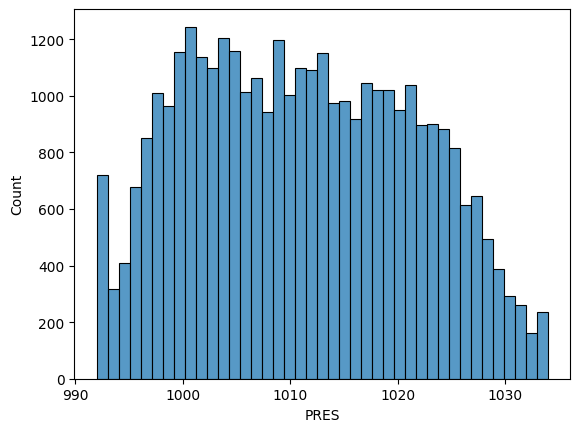

In [27]:
sns.histplot(prsa_data.PRES)

### 7. Избавьтесь от пропущенных значений в датасете.

<Axes: >

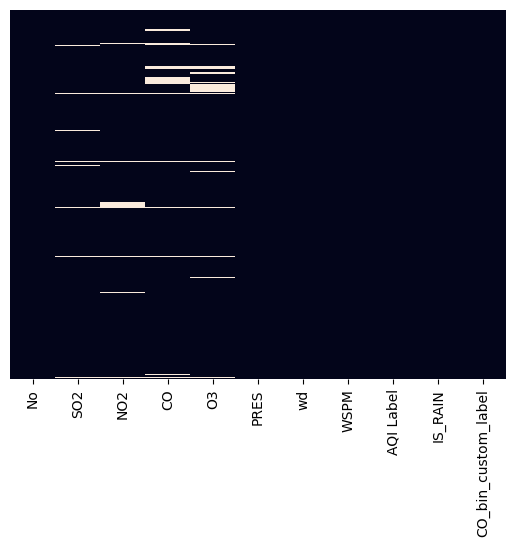

In [28]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [29]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [30]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

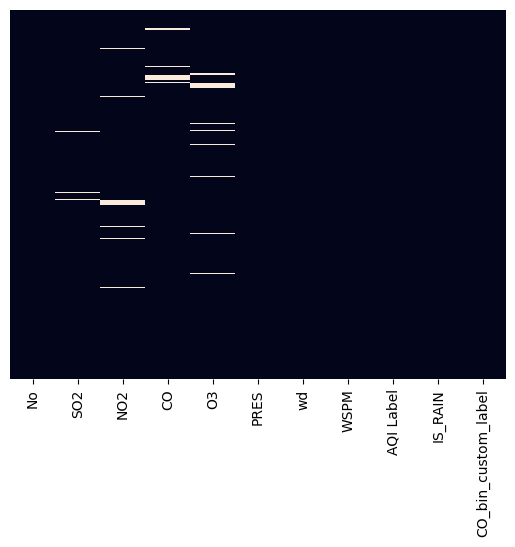

In [31]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [32]:
prsa_data.isnull().sum()

No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [33]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())
filler = prsa_data.O3[prsa_data.O3.isna()]
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)
prsa_data.O3 = prsa_data.O3.fillna(filler)

### 8. При необходимости округлите излишне точные значения атрибутов.

In [34]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data['SO2'] = np.array(np.round((prsa_data['SO2']), 2))

prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.00,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.00,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,1011.06,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,5,9.00,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,6,8.00,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


### 9. Рассмотрите возможность преобразования шкалы атрибута к логарифмической.


In [35]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<Axes: xlabel='SO2', ylabel='Count'>

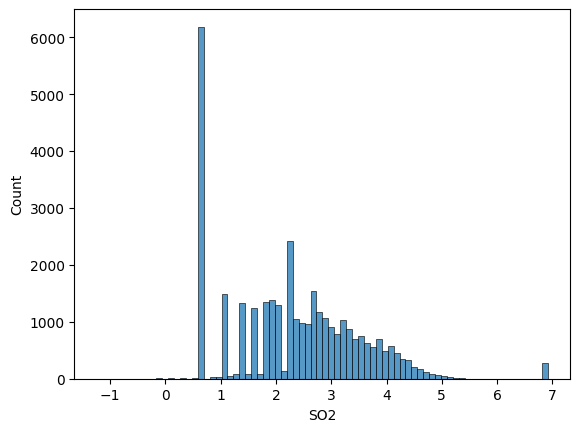

In [36]:
sns.histplot(prsa_data.SO2)

# Задания для самостоятельного выполнения

### При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

<Axes: xlabel='AQI Label', ylabel='SO2'>

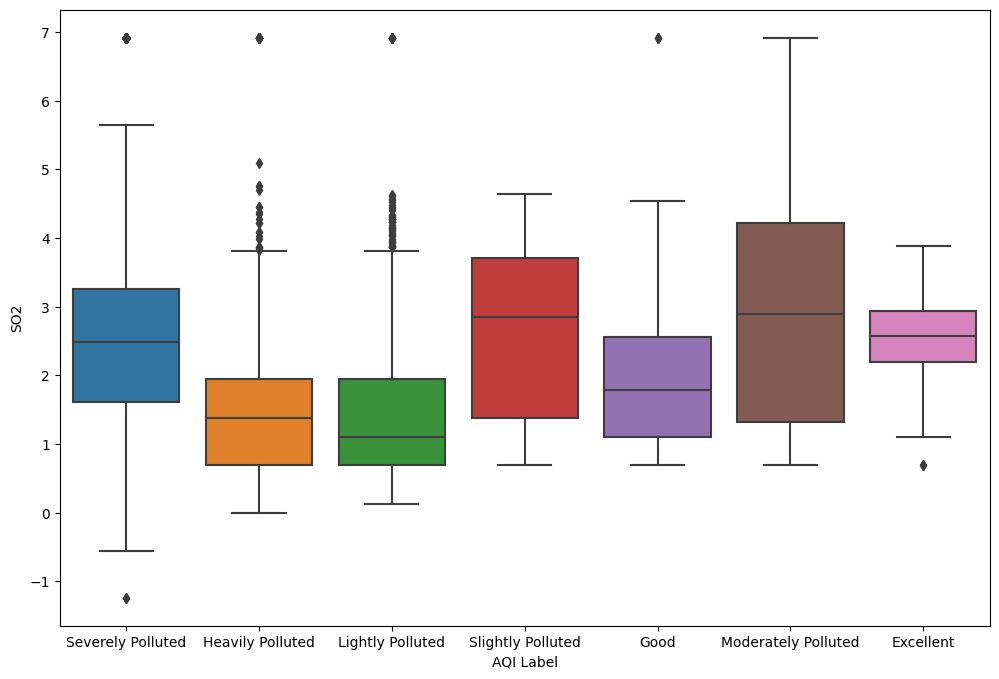

In [37]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(data=prsa_data, x="AQI Label", y="SO2")

<Axes: xlabel='AQI Label', ylabel='SO2'>

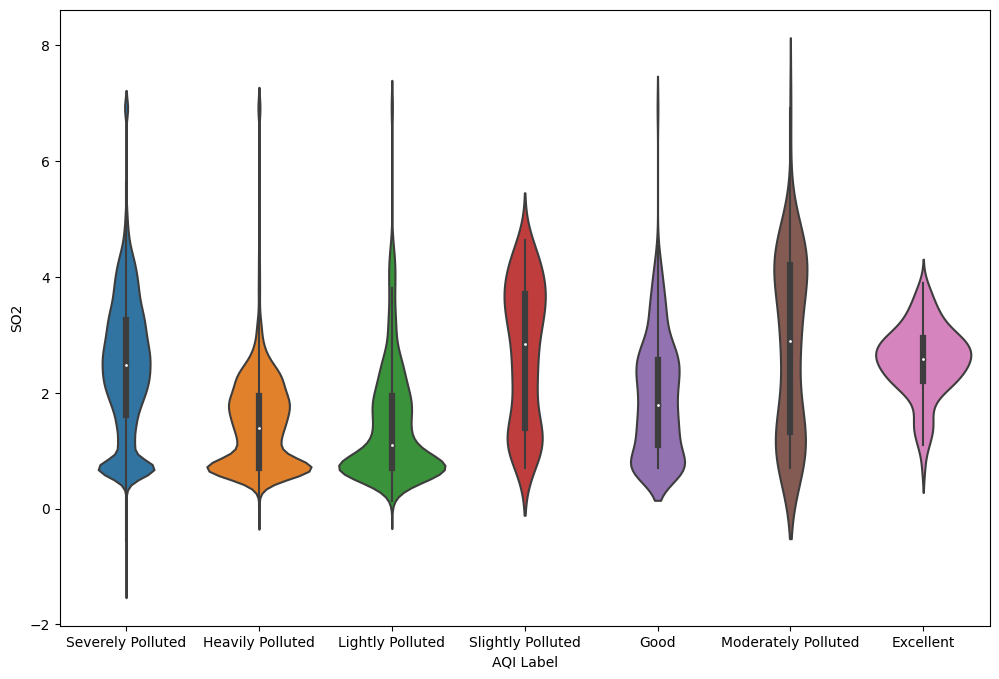

In [38]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=prsa_data, x="AQI Label", y="SO2")

### 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [39]:
lower = prsa_data.PRES.quantile(0.01)
upper = prsa_data.PRES.quantile(0.99)

prsa_data["PRES"] = prsa_data["PRES"].clip(lower, upper)

<Axes: xlabel='PRES', ylabel='Count'>

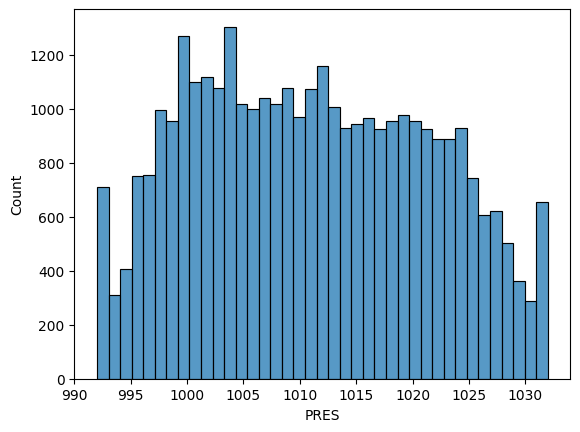

In [40]:
sns.histplot(prsa_data.PRES)

### 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

<Axes: >

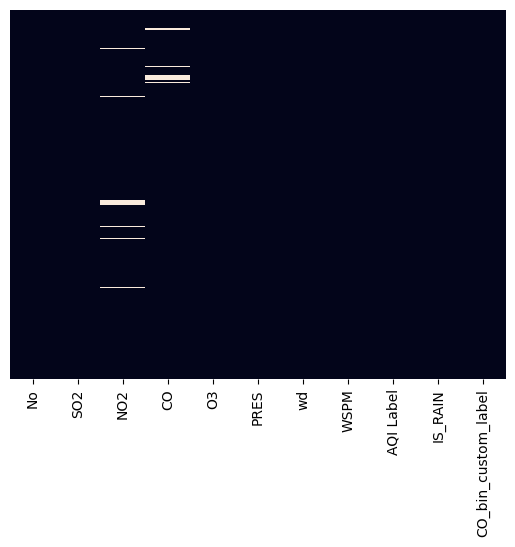

In [41]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [42]:
filler = prsa_data.NO2[prsa_data.NO2.isna()]
filler = prsa_data.NO2[~prsa_data.NO2.isna()].sample(n=len(filler)).set_axis(filler.index)
prsa_data.NO2 = prsa_data.NO2.fillna(filler)

prsa_data.CO = prsa_data.CO.fillna(prsa_data.CO.mean())

<Axes: >

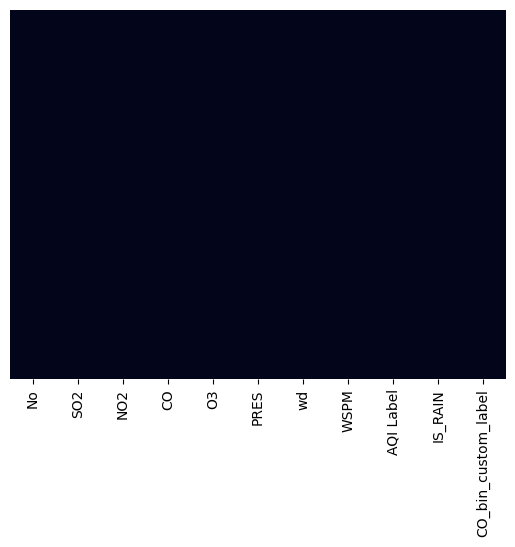

In [43]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

В столбце NO2 было много пропущенных значений, потому в качестве заполнения был выбран метод заполнения случайными данными, а для столбца CO был выбран метод заполнения средним, так как пропущенных значений было не так много

### 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [44]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34180 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   34180 non-null  int64  
 1   SO2                  34180 non-null  float64
 2   NO2                  34180 non-null  float64
 3   CO                   34180 non-null  float64
 4   O3                   34180 non-null  int64  
 5   PRES                 34180 non-null  float64
 6   wd                   34180 non-null  object 
 7   WSPM                 34180 non-null  float64
 8   AQI Label            34180 non-null  object 
 9   IS_RAIN              34180 non-null  float64
 10  CO_bin_custom_label  34180 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 3.1+ MB


Text(0.5, 1.0, 'После Yeo-Johnson')

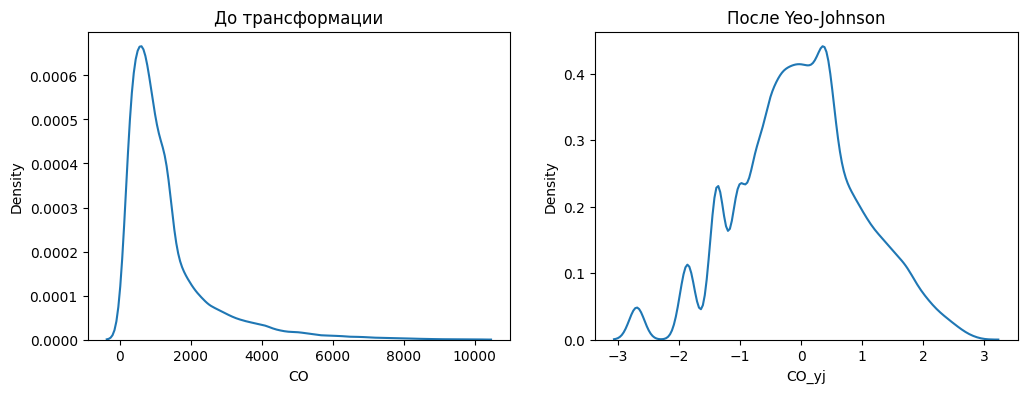

In [45]:
from sklearn.preprocessing import PowerTransformer


# Пример Yeo-Johnson трансформации
pt = PowerTransformer(method='yeo-johnson')
prsa_data[['NO2_yj', 'CO_yj']] = pt.fit_transform(prsa_data[['NO2', 'CO']])


import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(prsa_data['CO'], ax=axes[0])
axes[0].set_title("До трансформации")
sns.kdeplot(prsa_data['CO_yj'], ax=axes[1])
axes[1].set_title("После Yeo-Johnson")

Text(0.5, 1.0, 'После Yeo-Johnson')

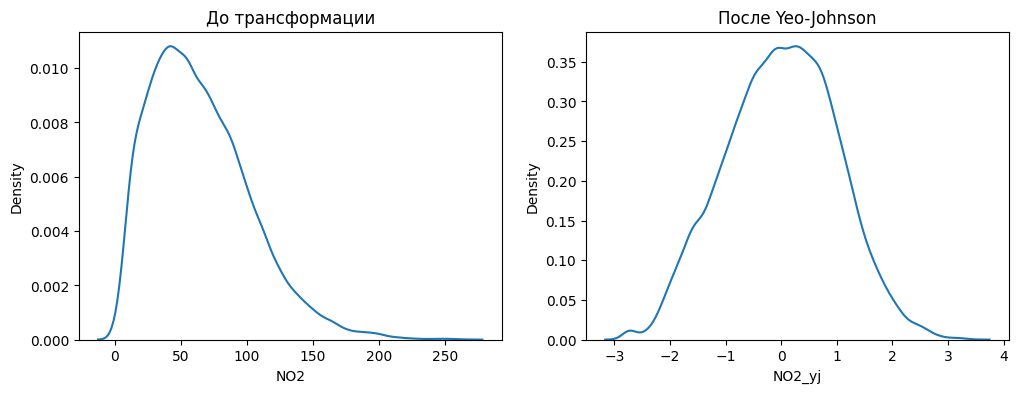

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(prsa_data['NO2'], ax=axes[0])
axes[0].set_title("До трансформации")
sns.kdeplot(prsa_data['NO2_yj'], ax=axes[1])
axes[1].set_title("После Yeo-Johnson")


In [47]:
prsa_data['WSPM_yj'] = pt.fit_transform(prsa_data[['WSPM']])

Text(0.5, 1.0, 'После Yeo-Johnson')

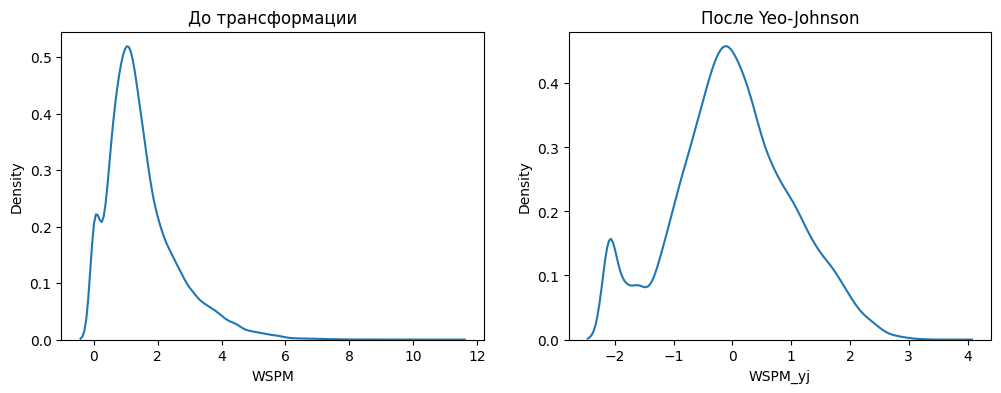

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(prsa_data['WSPM'], ax=axes[0])
axes[0].set_title("До трансформации")
sns.kdeplot(prsa_data['WSPM_yj'], ax=axes[1])
axes[1].set_title("После Yeo-Johnson")

In [49]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
prsa_data['PRES_scaled'] = minmax.fit_transform(prsa_data[['PRES']])

Text(0.5, 1.0, 'После MinMax')

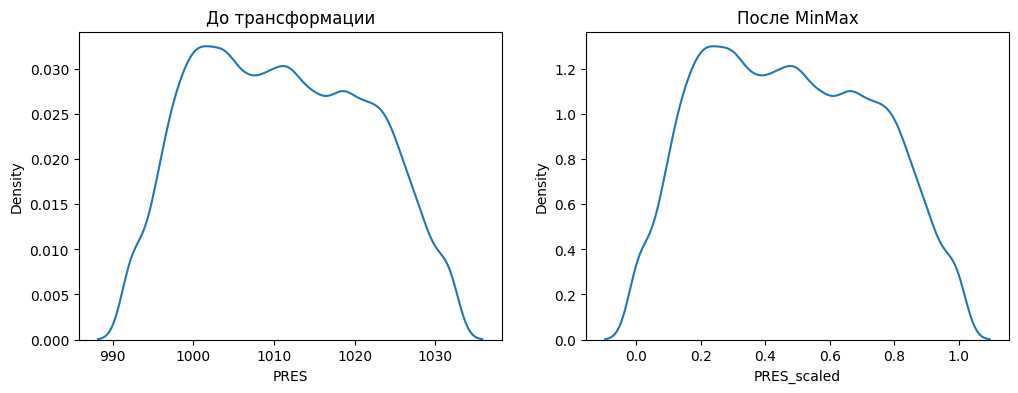

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(prsa_data['PRES'], ax=axes[0])
axes[0].set_title("До трансформации")
sns.kdeplot(prsa_data['PRES_scaled'], ax=axes[1])
axes[1].set_title("После MinMax")

In [51]:
prsa_data['O3_yj'] = pt.fit_transform(prsa_data[['O3']])

Text(0.5, 1.0, 'После Yeo-Johnson')

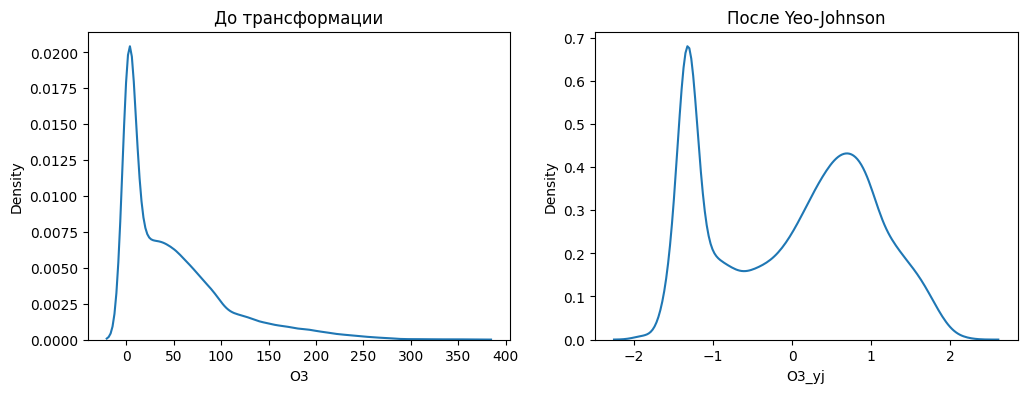

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(prsa_data['O3'], ax=axes[0])
axes[0].set_title("До трансформации")
sns.kdeplot(prsa_data['O3_yj'], ax=axes[1])
axes[1].set_title("После Yeo-Johnson")

Почти для всех признаков был выбран метод нормализации Yeo-johnson чтобы привести признаки к нормальному распределению, а для PRES был выбран minmax из за его особенностей распределения

Почти все данные имеют сильную положительную асимметрию, кроме PRES. Значения PRES распределены в узком диапазоне, и имеют распределение близкое к нормальному

### 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.


<Axes: >

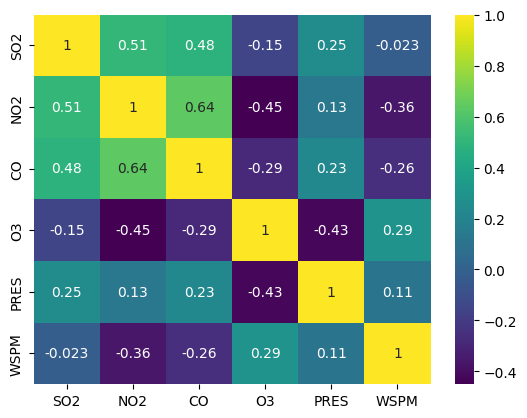

In [53]:
numerical_data = prsa_data[["SO2", "NO2", "CO", "O3", "PRES", "WSPM"]]
sns.heatmap(data=numerical_data.corr(), annot=True, cmap="viridis")

### 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

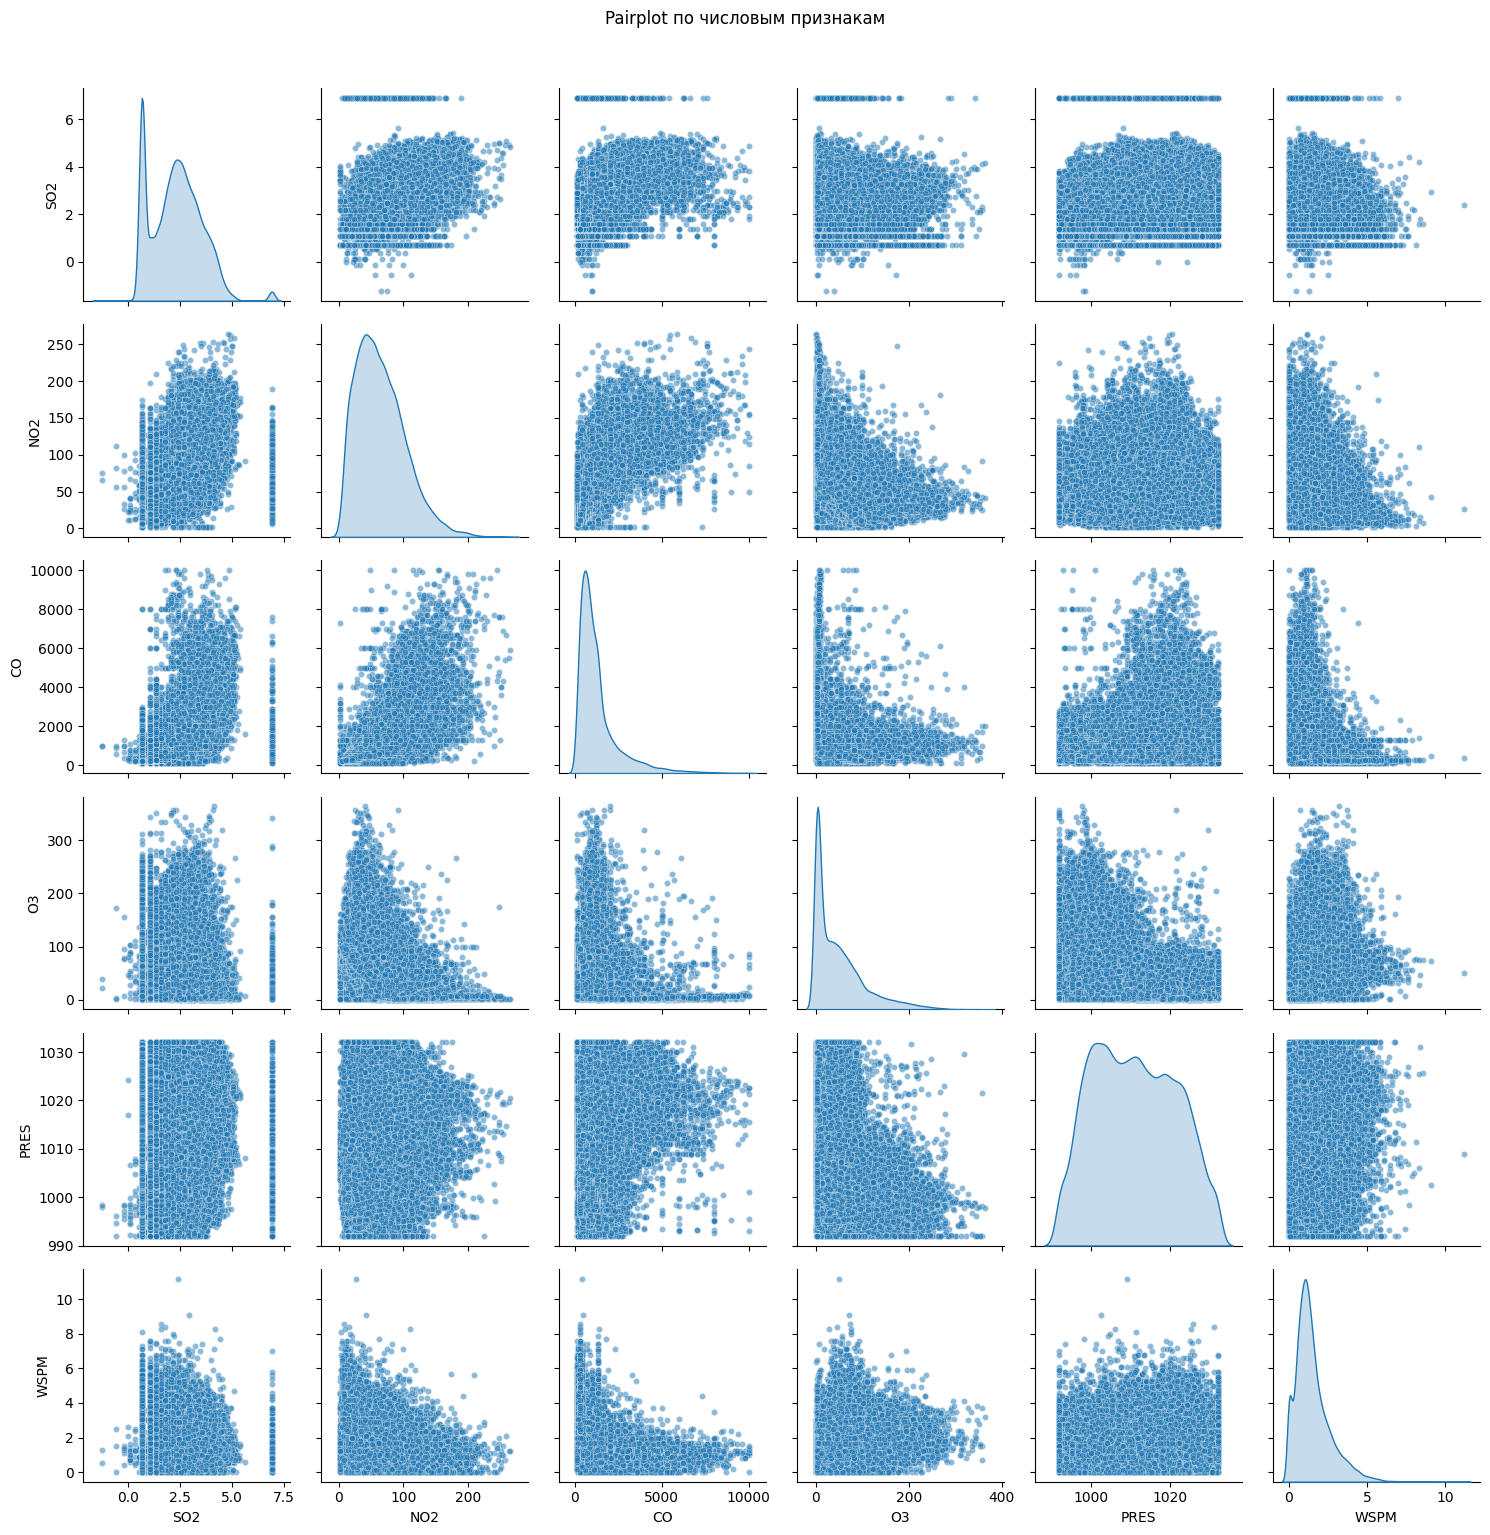

In [54]:
numerical_data = prsa_data[["SO2", "NO2", "CO", "O3", "PRES", "WSPM"]]

sns.pairplot(
    data=numerical_data,
    kind="scatter",
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 20}  
)

plt.suptitle("Pairplot по числовым признакам", y=1.02)
plt.tight_layout()
plt.show()

# Контрольные вопросы

**Как в датасете идентифицировать численные атрибуты?**  
Через `df.select_dtypes(include=['number'])`.

**Какие основные виды непрерывных распределений часто встречаются на практике анализа данных?**  
Нормальное, экспоненциальное, равномерное, логнормальное.

**Какие типы графиков можно использовать для визуализации одномерного непрерывного распределения?**  
Гистограммы, графики плотности (kde), boxplot.

**А совместного распределения с другой непрерывной переменной?**  
Scatterplot, pairplot, jointplot.

**А с категориальной переменной?**  
Boxplot, violinplot, swarmplot, stripplot.

**Как выбрать метод борьбы с пропущенными значениями?**  
Метод зависит от доли пропусков, структуры данных и важности признака: можно удалить строки/столбцы, заполнить средними значениями, использовать регрессию, KNN или MICE.
